In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rich.progress import track
from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [3]:
jmfile = 'test_025.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(3)

/home/ubuntu/notebook/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684574617961,351,HTTP Request FIBO,500,NaN,Thread Group FIBO-ThreadStarter 1-1,text,False,NaN,314,140,44,94,http://193.225.250.30/cpu/fibonacci_no_gc/Fibo,351,0,8,500,200
1,1684574617983,939,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-8,text,True,NaN,324,138,43,93,http://193.225.250.30/cpu/fibonacci_no_gc/16,939,0,9,500,200
2,1684574617985,1089,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-10,text,True,NaN,325,138,42,92,http://193.225.250.30/cpu/fibonacci_no_gc/16,1089,0,7,500,200


In [5]:
# Beérkezés sorrendje helyett a kiküldés sorrendjében rendezve

jf = jf.sort_values(by='timeStamp', ignore_index=True)

jf = jf.reset_index(drop=True)

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684574617961,351,HTTP Request FIBO,500,NaN,Thread Group FIBO-ThreadStarter 1-1,text,False,NaN,314,140,44,94,http://193.225.250.30/cpu/fibonacci_no_gc/Fibo,351,0,8,500,200
1,1684574617961,2002,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,325,138,35,85,http://193.225.250.30/cpu/fibonacci_no_gc/16,2002,0,7,500,200
2,1684574617962,3348,HTTP Request PRIME,200,NaN,Thread Group PRIME-ThreadStarter 2-1,text,True,NaN,330,136,40,65,http://193.225.250.30/cpu/prime_no_gc/1700,3348,0,7,500,200


In [6]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

print(FIBO.shape)
print(PRIME.shape)

(18800, 19)
(18700, 19)


In [7]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-26 19:48:54.294694
Second: 54


In [8]:
jf = jf.astype({'timeStamp':'int'})
FIBO  = FIBO.astype({'timeStamp':'int'})
PRIME = PRIME.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
FIBO['date'] = FIBO['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
PRIME['date'] = PRIME['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

FIBO.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1684574617961,351,HTTP Request FIBO,500,NaN,Thread Group FIBO-ThreadStarter 1-1,text,False,NaN,314,140,44,94,http://193.225.250.30/cpu/fibonacci_no_gc/Fibo,351,0,8,500,200,2023-05-20 09:23:37.961
1,1684574617961,2002,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,325,138,35,85,http://193.225.250.30/cpu/fibonacci_no_gc/16,2002,0,7,500,200,2023-05-20 09:23:37.961


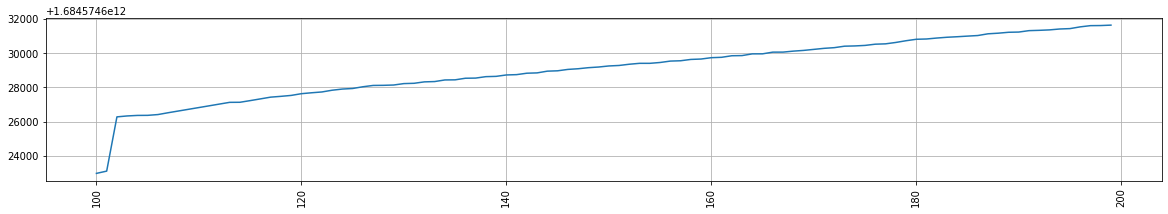

In [9]:
F = 100

plt.figure(figsize=(20, 3))
plt.plot(jf.iloc[F:F+100]['timeStamp'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

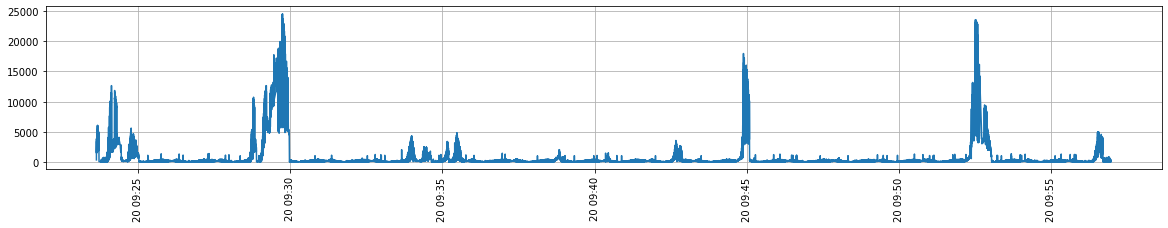

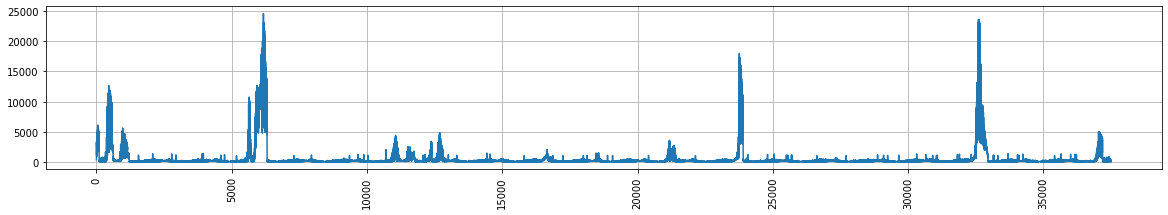

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

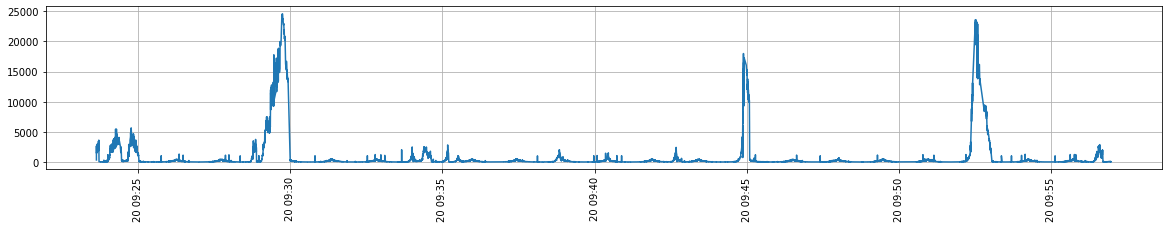

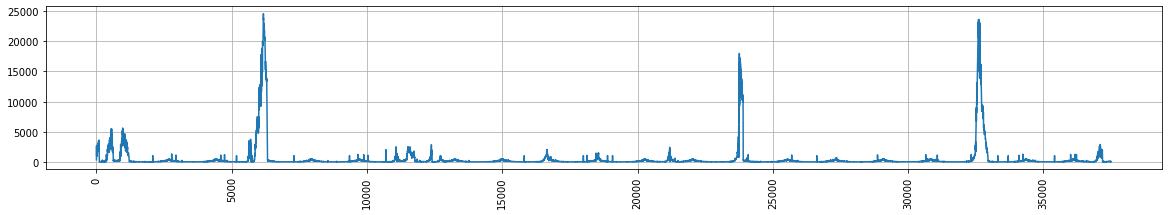

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

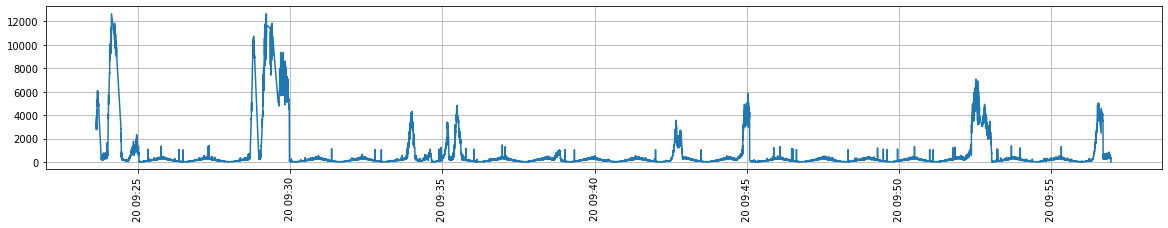

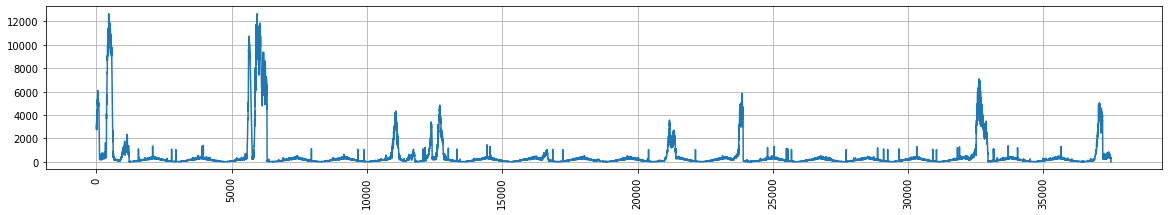

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(PRIME['date'], PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

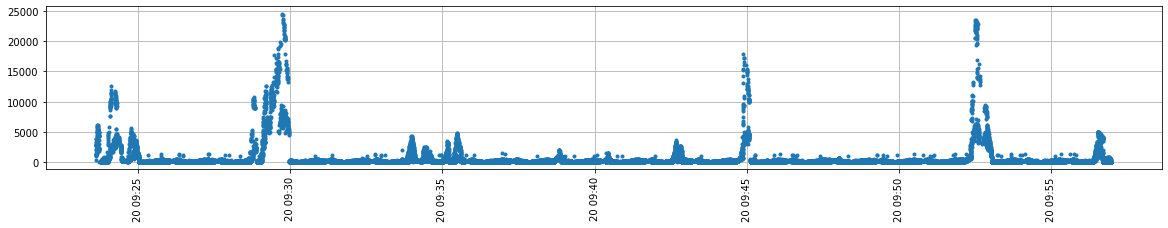

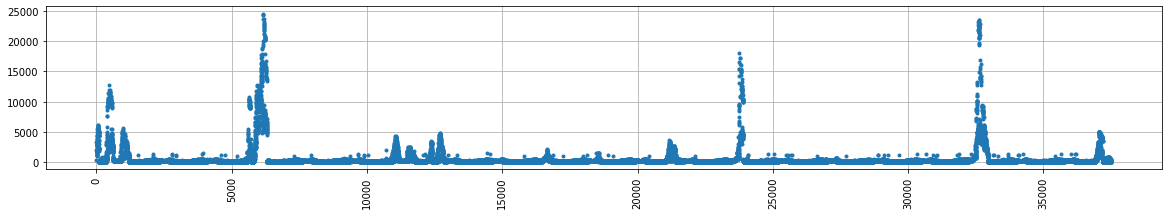

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [14]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

In [15]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


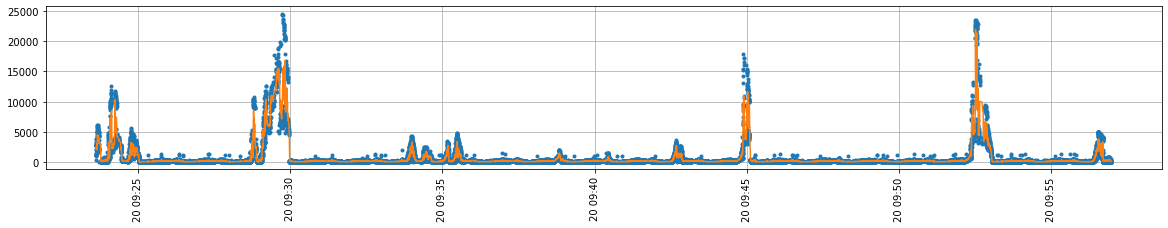

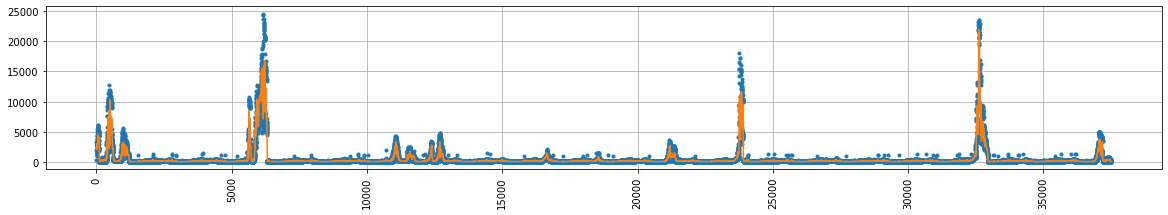

In [16]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [17]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
9    465.609733
Name: Latency, dtype: float64

In [18]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
23    1089.821727
24    2093.133578
25     140.070529
26     113.330814
27     158.949749
28     548.919807
29    8115.020333
30     109.538977
31     118.556951
32     163.979027
33     262.658369
34     451.612932
35     580.619092
36     106.922111
37     127.382872
38     260.181507
39     109.089316
40     148.914479
41     154.789782
42     409.578855
43     123.817726
44     670.414365
45     691.736372
46     140.601852
47     142.499161
48     106.358696
49     134.598491
50     153.889916
51     111.543933
52    3365.193508
53     198.915167
54     113.202181
55     162.391960
56     584.022835
Name: Latency, dtype: float64

In [19]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
9     23      1089.821727
      24      2093.133578
      25       140.070529
      26       113.330814
      27       158.949749
      28       548.919807
      29      8115.020333
      30       109.538977
      31       118.556951
      32       163.979027
      33       262.658369
      34       451.612932
      35       580.619092
      36       106.922111
      37       127.382872
      38       260.181507
      39       109.089316
      40       148.914479
      41       154.789782
      42       409.578855
      43       123.817726
      44       670.414365
      45       691.736372
      46       140.601852
      47       142.499161
      48       106.358696
      49       134.598491
      50       153.889916
      51       111.543933
      52      3365.193508
      53       198.915167
      54       113.202181
      55       162.391960
      56       584.022835
Name: Latency, dtype: float64

In [20]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

37

In [21]:
jf['hour']   = jf['date'].map(lambda x : x.hour)
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [22]:
md = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [23]:
md

date  date  date
9     23    37      2198.550000
            38      2690.285714
            39      3727.600000
            40      4079.400000
            41      3766.631579
                       ...     
      56    54       333.842105
            55       287.700000
            56       246.400000
            57       150.950000
            58        80.500000
Name: Latency, Length: 1990, dtype: float64

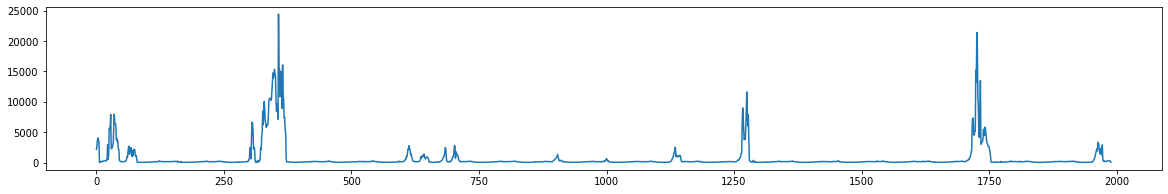

In [24]:
# Másodperc alapő válaszidő átlagok

plt.figure(figsize=(20, 3))
plt.plot(md.values)
plt.show()

In [25]:
_hours   = md.index.levels[0]
_minutes = md.index.levels[1]
_seconds = md.index.levels[2]

_hours_lowest =_hours.min()
_hours_highest = _hours.max()

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))
print(' hrs min %.1d hrs max %.1d' % (_hours_lowest, _hours_highest))

 sec min 0 sec max 59
 min min 23 min max 56
 hrs min 9 hrs max 9


In [26]:
tp = []

start_date = str(jf['date'].loc[0])[:11]

for _ in md.index:
    h = _[0]
    # h = str(_[0]).zfill(2)
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    s = str('%02d' % (_[2],))
    # print(h, m, s)
    tp.append(start_date + str(h) + ':' + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-20 09:23:37,2198.550000
1,2023-05-20 09:23:38,2690.285714
2,2023-05-20 09:23:39,3727.600000
3,2023-05-20 09:23:40,4079.400000
4,2023-05-20 09:23:41,3766.631579


In [27]:
mz = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  date  sec
9     23    3      2892.351852
            4      1615.285714
            5       280.554404
      24    0      3911.288136
            1      5655.030000
                      ...     
      56    1        63.535000
            2       626.174419
            3      2432.109489
            4       583.126374
            5       272.981250
Name: Latency, Length: 201, dtype: float64

In [28]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:11]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    h = _[0]
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    
    if c == 0:
        c += 1
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(_first_sec))
        print(tz)
    else:
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(s*10))
        
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

['2023-05-20 09:23:37']


,date,md
0,2023-05-20 09:23:37,2892.351852
1,2023-05-20 09:23:40,1615.285714
2,2023-05-20 09:23:50,280.554404
3,2023-05-20 09:24:00,3911.288136
4,2023-05-20 09:24:10,5655.030000


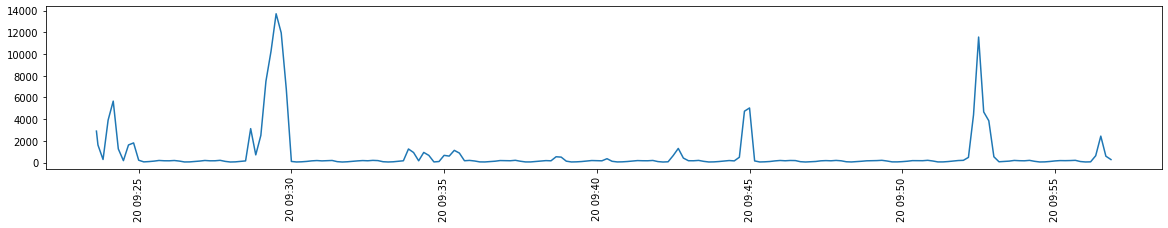

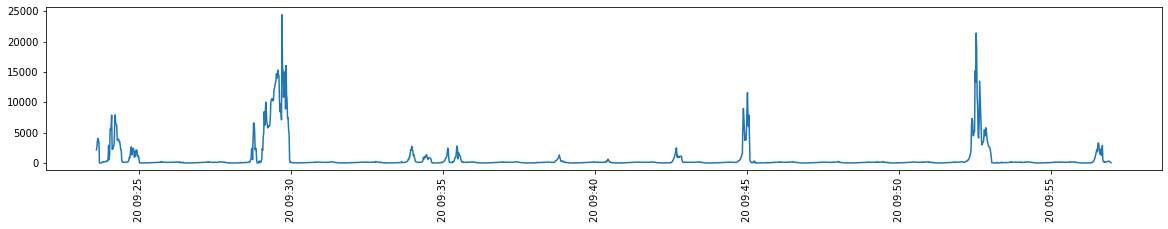

In [29]:
plt.figure(figsize=(20, 3))
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.figure(figsize=(20, 3))
plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [30]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-20 09:23:37
2023-05-20 09:23:37


In [31]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

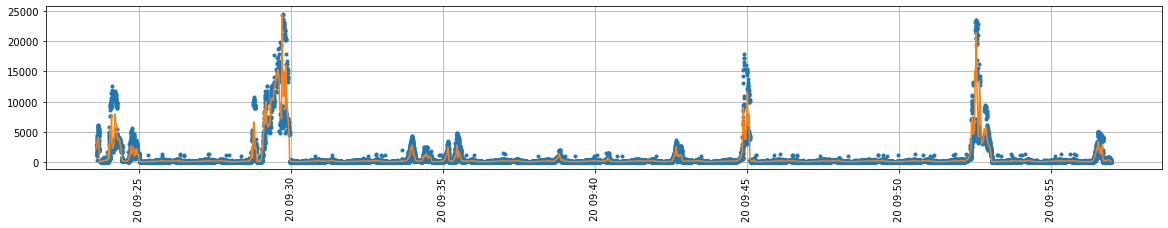

In [32]:
# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

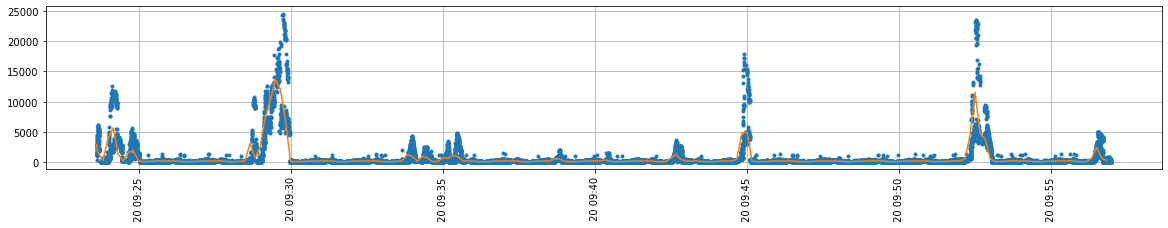

In [33]:
# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

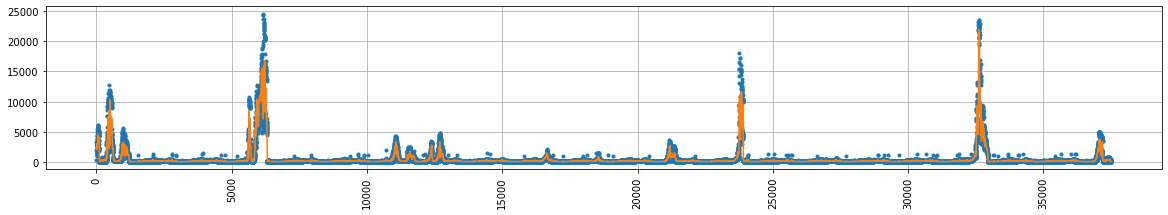

In [34]:
# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)

# Az erre helyezet 10-es mozgóátlag nem az elmúlt 10 mp hanem az utolsó 10 kérés válaszidejének átlaga
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

---

Most van az, hogy jól jönne a **Scaler.log** mert a **Metric.log** csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

A **Scaler.log**-ban csak a skálázáskor kiadott parancs időbélyege van eltárolva.

# Scaler.log - Metric.log - JMeter.log

In [66]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,09:23:43,09:23:4,3352.12430,2121.454114,1,3.5,48.6,49.3,50.7,...,109863.2,988064.0,2048.0,347312.0,100.0,48.9,48.9,42.6,48.4,42.6
1,192.168.0.6,09:23:50,09:23:5,5377.24090,1643.983272,2,11.4,93.5,3.8,96.2,...,109989.6,996090.8,2048.0,347354.0,100.0,68.8,68.8,70.3,68.8,70.4
2,192.168.0.6,09:24:00,09:24:0,614.68840,209.768952,3,18.7,90.9,7.1,92.8,...,109228.0,995050.0,2048.0,347337.6,100.0,45.4,45.4,44.2,45.4,44.3
3,192.168.0.6,09:24:13,09:24:1,4686.58645,1914.126807,1,8.8,97.5,0.2,99.8,...,109649.6,998286.8,2048.0,347364.8,100.0,54.4,54.4,50.7,54.4,50.7
4,192.168.0.6,09:24:27,09:24:2,10071.37840,3957.221233,1,7.3,97.6,0.0,100.0,...,109748.4,1004097.6,2048.0,347361.2,100.0,43.8,43.8,44.8,43.8,44.8


In [67]:
jf[['date']].head(3)

,date
0,2023-05-20 09:23:37.961
1,2023-05-20 09:23:37.961
2,2023-05-20 09:23:37.962


In [68]:
df[['time']].head(3)

,time
0,09:23:4
1,09:23:5
2,09:24:0


In [69]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [70]:
scale_file_name = 'scaled_train_by_none.log'

sf = pd.read_csv(scale_file_name, sep=',', header=0)

display(sf.head(2))

,time,notification,actual_vm_number_was,actual_vm_number_is
0,09:23:43,Worker 192.168.0.73 added.,1,2
1,09:23:50,Worker 192.168.0.91 added.,2,3


In [71]:
print('Scaler.log')
print(sf['time'].iloc[0])
print(sf['time'].iloc[-1])
print(len(sf))

print('JMeter.log')
print(jf['date'].iloc[0])
print(jf['date'].iloc[-1])
print(len(jf))

Scaler.log
09:23:43
09:56:50
288
JMeter.log
2023-05-20 09:23:37.961000
2023-05-20 09:56:58.100000
37500


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [72]:
jf['date']

0       2023-05-20 09:23:37.961
1       2023-05-20 09:23:37.961
2       2023-05-20 09:23:37.962
3       2023-05-20 09:23:37.963
4       2023-05-20 09:23:37.963
                  ...          
37495   2023-05-20 09:56:57.869
37496   2023-05-20 09:56:57.913
37497   2023-05-20 09:56:57.934
37498   2023-05-20 09:56:58.015
37499   2023-05-20 09:56:58.100
Name: date, Length: 37500, dtype: datetime64[ns]

In [73]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0      09:23:43
1      09:23:50
2      09:24:00
3      09:24:00
4      09:24:27
         ...   
283    09:56:20
284    09:56:42
285    09:56:42
286    09:56:42
287    09:56:50
Name: time, Length: 288, dtype: object

In [74]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '
print(start_date)

sf['date'] = start_date + sf['time']
sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-05-20 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,09:23:43,Worker 192.168.0.73 added.,1,2,2023-05-20 09:23:43
1,09:23:50,Worker 192.168.0.91 added.,2,3,2023-05-20 09:23:50
2,09:24:00,Worker 192.168.0.73 removed.,3,2,2023-05-20 09:24:00


In [75]:
sf['date']

0     2023-05-20 09:23:43
1     2023-05-20 09:23:50
2     2023-05-20 09:24:00
3     2023-05-20 09:24:00
4     2023-05-20 09:24:27
              ...        
283   2023-05-20 09:56:20
284   2023-05-20 09:56:42
285   2023-05-20 09:56:42
286   2023-05-20 09:56:42
287   2023-05-20 09:56:50
Name: date, Length: 288, dtype: datetime64[ns]

In [76]:
jf['date']

0       2023-05-20 09:23:37.961
1       2023-05-20 09:23:37.961
2       2023-05-20 09:23:37.962
3       2023-05-20 09:23:37.963
4       2023-05-20 09:23:37.963
                  ...          
37495   2023-05-20 09:56:57.869
37496   2023-05-20 09:56:57.913
37497   2023-05-20 09:56:57.934
37498   2023-05-20 09:56:58.015
37499   2023-05-20 09:56:58.100
Name: date, Length: 37500, dtype: datetime64[ns]

In [77]:
jf['date'].iloc[3]

Timestamp('2023-05-20 09:23:37.963000')

In [78]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [79]:
jf['dates'].iloc[3]

Timestamp('2023-05-20 09:23:37')

In [80]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

# Sajnos ez a megoldás ezen az adatbázison nem lesz jó

# -----------------------------------------------------


# Bár most azok után, hogy rendeztem az adatokat a time
# szerint már lehet, hogy jó lesz


_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in track(range(jf['Latency'].shape[0])):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]
    
    if c < len(sf):
        if jf_date == _current_scale_date:
            # print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
3


In [81]:
sf.iloc[88:100].head(100)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
88,09:33:20,Worker 192.168.0.146 removed.,5,4,2023-05-20 09:33:20
89,09:33:20,Worker 192.168.0.148 removed.,4,3,2023-05-20 09:33:20
90,09:33:31,Worker 192.168.0.192 removed.,3,2,2023-05-20 09:33:31
91,09:33:40,Worker 192.168.0.73 added.,2,3,2023-05-20 09:33:40
92,09:33:50,Worker 192.168.0.73 removed.,3,2,2023-05-20 09:33:50
93,09:34:02,Worker 192.168.0.73 added.,2,3,2023-05-20 09:34:02
94,09:34:10,Worker 192.168.0.91 added.,3,4,2023-05-20 09:34:10
95,09:34:20,Worker 192.168.0.73 removed.,4,3,2023-05-20 09:34:20
96,09:34:20,Worker 192.168.0.91 removed.,3,2,2023-05-20 09:34:20
97,09:34:31,Worker 192.168.0.220 removed.,2,1,2023-05-20 09:34:31


Amúgy érdkes, hogy milyen időpontokban ad hozzá, vesz el vm-ket.

Megnéztem a programot amit írtam és akkor kerül bele a **Scale.log** filébe a bejegyzés és az időbélyeg,
amikor kiadta a skálázási parancsot.

Ez az esetek többségében 10-ik másodperc valahányszorosa.

Nem elfelejteni, hogy a tanulóadatok előállításánál nincs semmilyen számátás ami miatt késne a rendszer.

Ezért az a gyanúm, hogy a tényleges skálázásnál ez már nem így lesz.

Ennek ellenére látok néhány adatot amikor példul

    92 	09:33:50 	Worker 192.168.0.73 removed.
    93 	09:34:02 	Worker 192.168.0.73 added.

Nem teljesen értem, hogy a faszba fordulhatott elő, hogy két máodperc múlva is meg lett hívva ez az eljárás.

Ezért ennek most egy picit utána nézek.

## Sajnos meg is fejtettem az okát.

Ugye amikor túl van terhelve a rendszer akkor később érkezik be egy válaszidő ezért és mivel az egész rendszer akkor triggerelődik amikor bejön egy válaszidő ezért van ez a csúszkálás.

Ez megoldódna ha minden 10-ik másodpercben lefutna a rendszer de jelenleg nem így működik, és most még nem is foglalkozom vele, hogy átírjam a rendszert.

In [82]:
sf_second = sf['date'].dt.second

np.unique(sf_second, return_counts=True)

(array([ 0,  1,  2,  5, 10, 11, 12, 13, 20, 21, 22, 27, 30, 31, 32, 40, 41,
        42, 43, 50, 51, 52, 53, 58]),
 array([53,  3,  3,  3, 41,  4,  2,  2, 33,  3,  1,  3, 31,  4,  1, 33, 10,
         4,  1, 37,  6,  5,  3,  2]))

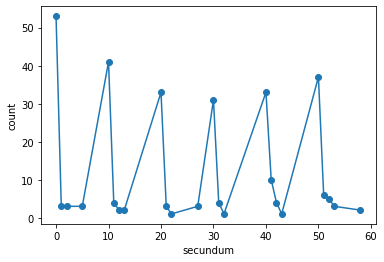

In [83]:
_ = np.unique(sf_second, return_counts=True)

plt.scatter(_[0], _[1])
plt.plot(_[0], _[1])
plt.xlabel('secundum')
plt.ylabel('count')
plt.show()

# többségében 10 valahányszorosára jön ki a skálázás, de sok olyan eset is van amikor nem.

In [84]:
# Van e bárhol ilyen dátum?

(jf['dates'] == '2023-05-21 09:22:03').any(axis=0)

False

In [85]:
jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1684574617961,351,HTTP Request FIBO,500,NaN,Thread Group FIBO-ThreadStarter 1-1,text,False,NaN,314,...,200,2023-05-20 09:23:37.961,0,NaN,9,23,37,3,2023-05-20 09:23:37,1
1,1684574617961,2002,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,325,...,200,2023-05-20 09:23:37.961,1,NaN,9,23,37,3,2023-05-20 09:23:37,1
2,1684574617962,3348,HTTP Request PRIME,200,NaN,Thread Group PRIME-ThreadStarter 2-1,text,True,NaN,330,...,200,2023-05-20 09:23:37.962,2,NaN,9,23,37,3,2023-05-20 09:23:37,1


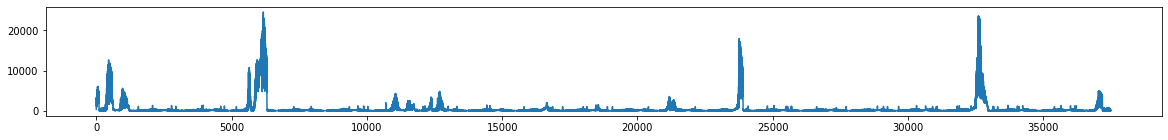

In [86]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['Latency'])
plt.show()

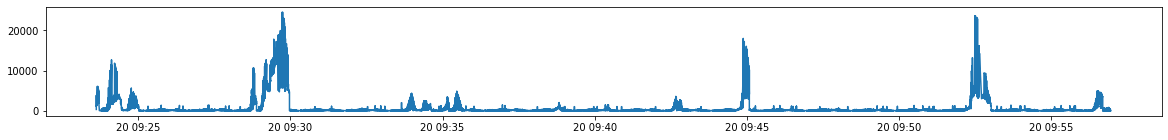

In [87]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['Latency'])
plt.show()

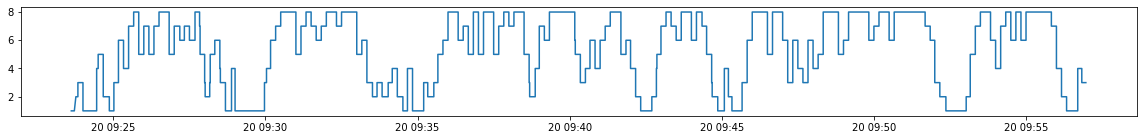

In [88]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

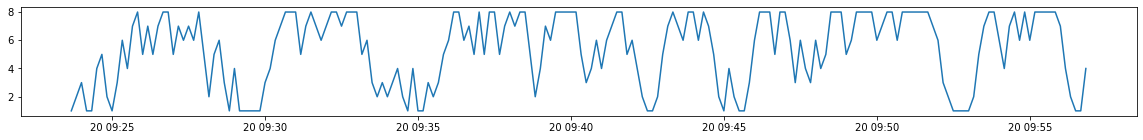

In [89]:
# Metric.log-ból kiolvasott VM Number

plt.figure(figsize=(20,2))
plt.plot(df['nntime'], df['worker_number'])
plt.show()

In [90]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


## Ezt feljebb már megcsináltam

De most itt hagyom mert csak plottolás

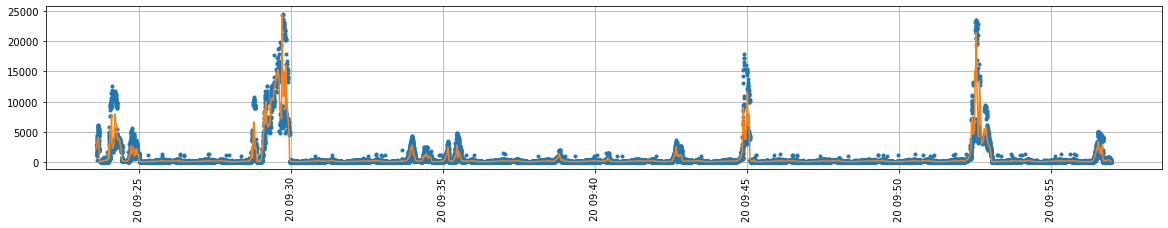

In [91]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Ezen dolgoztam

Hogy a JMeter.log és a Metric.log vagyis Scale.log wm_number egy df-be és egy ábrára kerüljenek.

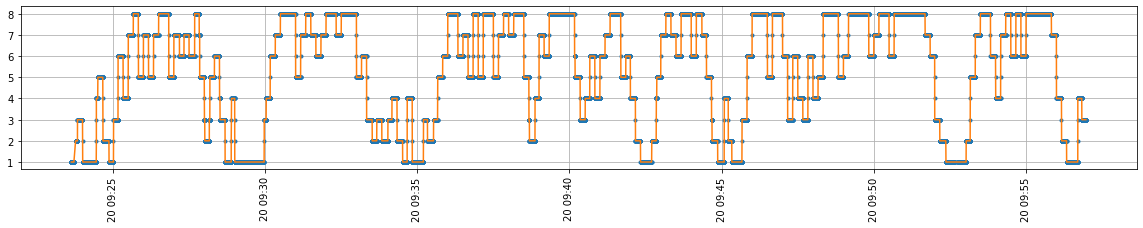

In [92]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [93]:
# Ellenőrzés (felületes)

sf.tail(5)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
283,09:56:20,Worker 192.168.0.220 removed.,2,1,2023-05-20 09:56:20
284,09:56:42,Worker 192.168.0.73 added.,1,2,2023-05-20 09:56:42
285,09:56:42,Worker 192.168.0.91 added.,2,3,2023-05-20 09:56:42
286,09:56:42,Worker 192.168.0.93 added.,3,4,2023-05-20 09:56:42
287,09:56:50,Worker 192.168.0.73 removed.,4,3,2023-05-20 09:56:50


## Ezen dolgoztam

A két logfiléből kinyert adat együtt - JMeter.log és Scale.log vm_number

**tp\['date'\]** és **tp\['md'\]** a JMeter.log-ból számolt másodpercekre lebontott átlagú **Latency** a JMetric.log-ból.

**jf\['date'\]** és **jf\['sf_vm'\]** a Scaler.log alapján a JMeter df-be létrehozott **Worker Number**

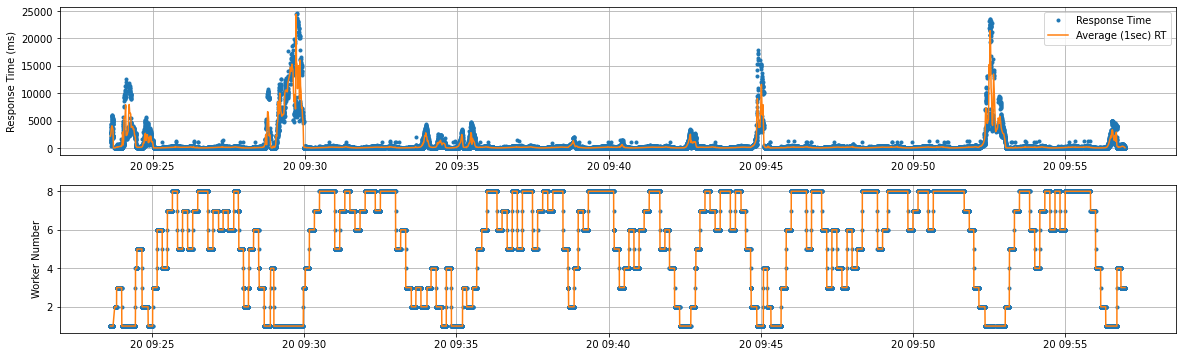

In [94]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## A jf alapján meg lehet nézni mindkét API-t

A jf alapján meg lehet nézni mindkét API-t?

In [95]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

## JMeter.log alapján

A két REST API 10 másodpercenként mért átlagos válaszideje - a **JMeter.csv** alapján.

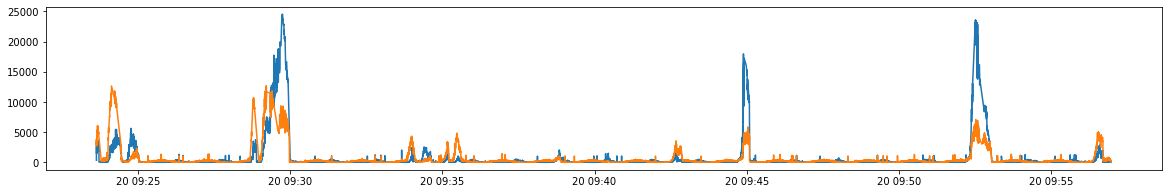

In [96]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.plot(PRIME['date'], PRIME['Latency'])
plt.show()

## JMeter.log és Scaler.log alapján

Mellé teszem a **Scaler.log** alapján kinyert **worker_number** válotzót is.

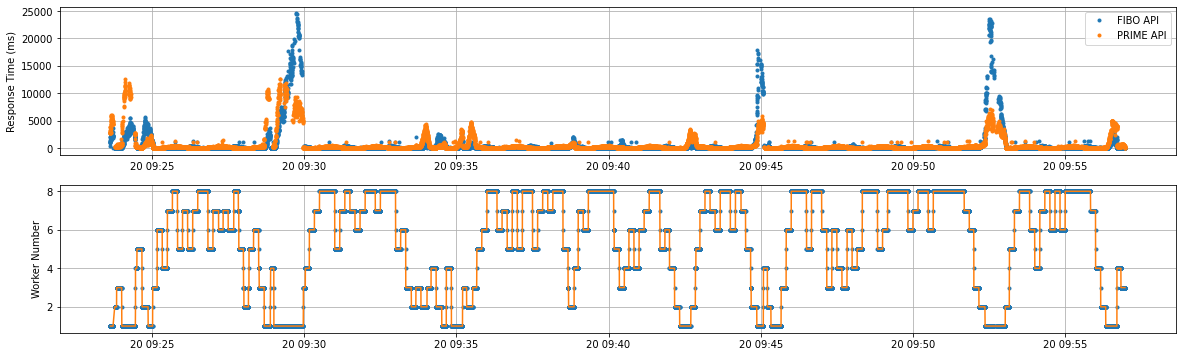

In [97]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(FIBO['date'], FIBO['Latency'], marker='.', linewidth=0, label='FIBO API')
ax0.plot(PRIME['date'], PRIME['Latency'], marker='.', linewidth=0, label='PRIME API')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test26 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

## Fontos

Ami itt kövektezik, az nem lehet annyira pontos mint a JMeter.log és a Scaler.log alapján összerakott megoldás.

**Miért?**

Mert a Metric.log filokban a MyLog.log fileből és az Access.log-ból kinyert és 10 másodpercre aggregált átlagok vannak.

**Megjegyzés:**

A **Metric.log** fájlba az idő **HH:MM:S** formátumba kerül. Ezért még hozzá kell adnom az **Y-m-d** adatot és egy **0**-t a **s** mögé.

Azt viszont, hogy mi volt az **Év-Hónap-Nap** a **Metric.log** filéből nem lehet megtudni, de ha rendesen tároltam el a teszt mérési eredményket akkor a könyvtárban ott van a **JMeter.csv** file is amiben viszont benne van a dátum.

Ha egy mérés nem csúszik át egyik napból a másikba akkor egyszerűen ki lehet olvani a **JMeter.csv** file első sorából a dátumot és azt beilleszteni a **Metric.log** adataiba.

Egyszerűbb lett volna, ha a **Metric.log** készítésénél beillesztem a dátumot is amikor a mérés zajlik de most már így alakult és nem fogok 26 mérést újra csinálni.

In [98]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


## Csak a Metric.log alapján

Ennél a megoldásnál jobb az amelyiket a **JMeter.csv** és a **Scaler.log** alapján raktam össze, mert sokkal nagyobb a felbontása (kérés alapú, vagy másodperc alapú)

De mivel a metrikákat és a tényleges döntéseket is ez alapján hozza meg az optimizer ezért látni akarom ezt is.

Itt viszont REST API-ra szétbontva nézem meg a válaszidő és a virtuális gépek számának alakulását a tisztán a **Metric.log** alapján.

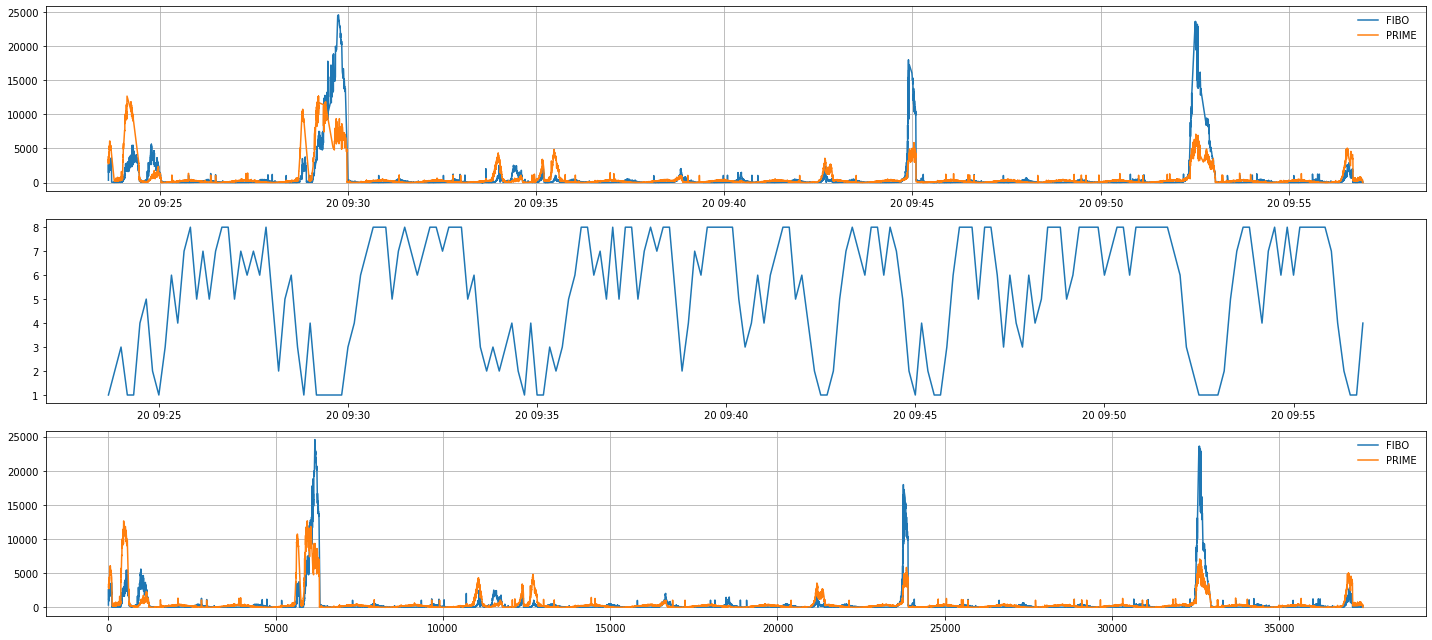

In [99]:
# Teljesen jó,

# ---

# Kiegészítés

# Azért ez még mindíg nem tökéletes

# Az igazi az lenne ha a scaler.log-ból olvasnám ki, hogy mikor volt skálázás és azt tenném rá.


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(FIBO['date'], FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax0.plot(PRIME['date'], PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax2.plot(PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

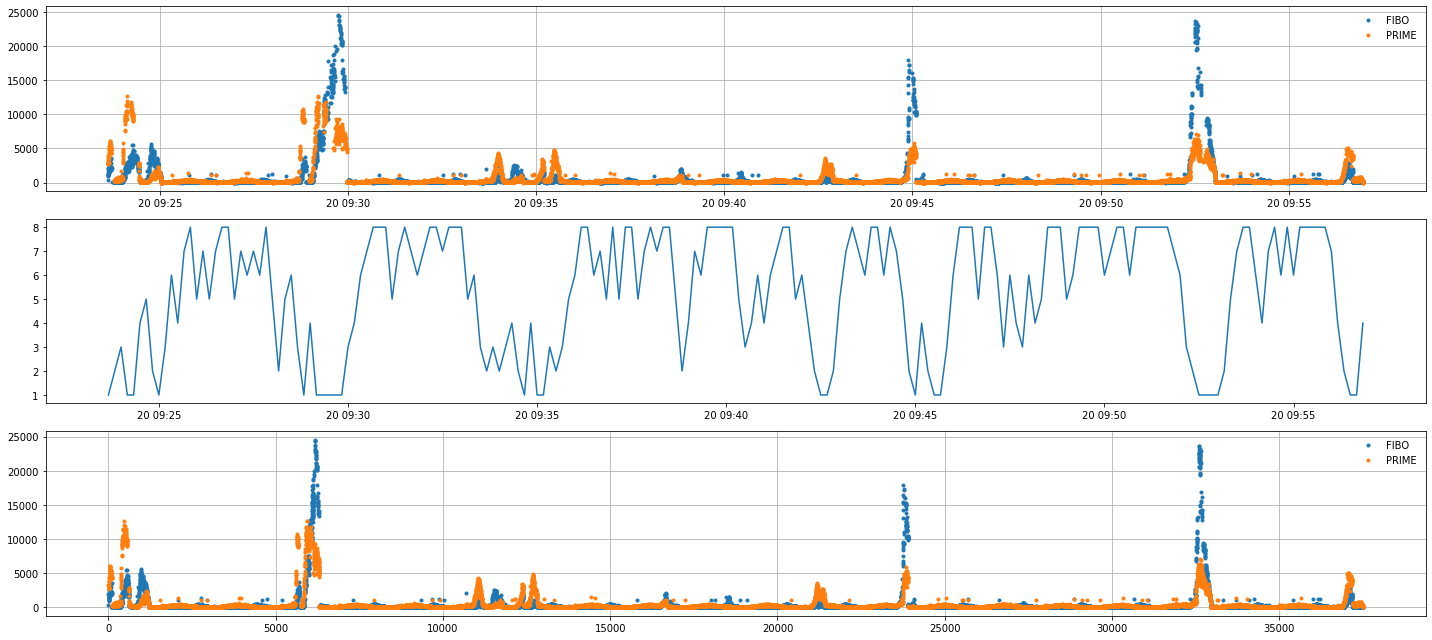

In [100]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [101]:
start_date = '2023-05-20 9:00'
end_date = '2023-05-20 10:30'

mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
F = FIBO.loc[mask]

F.shape

(18800, 28)

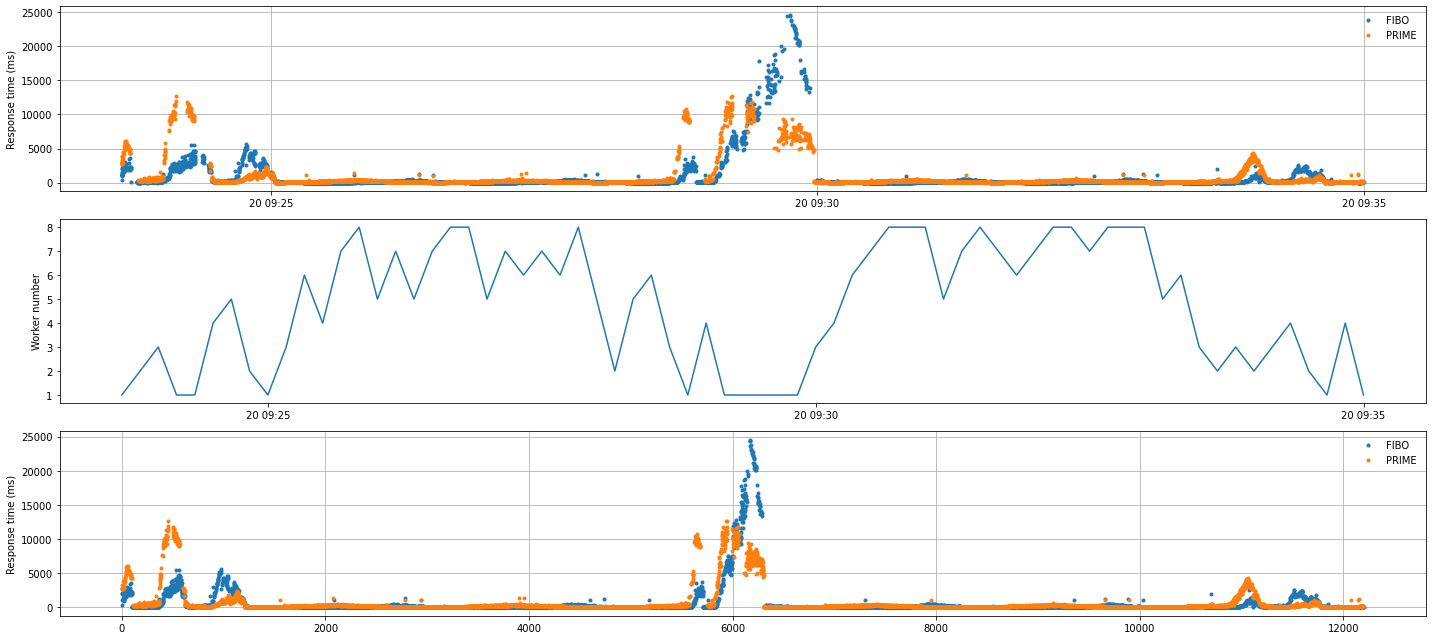

In [104]:
def zoom(start_date, end_date):

    mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
    F = FIBO.loc[mask]

    mask = (PRIME['date'] > start_date) & (PRIME['date'] <= end_date)
    P = PRIME.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(F['date'], F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax0.plot(P['date'], P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax0.set_ylabel('Response time (ms)')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.set_ylabel('Worker number')
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax2.plot(P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax2.set_ylabel('Response time (ms)')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-20 8:59', '2023-05-20 9:35')

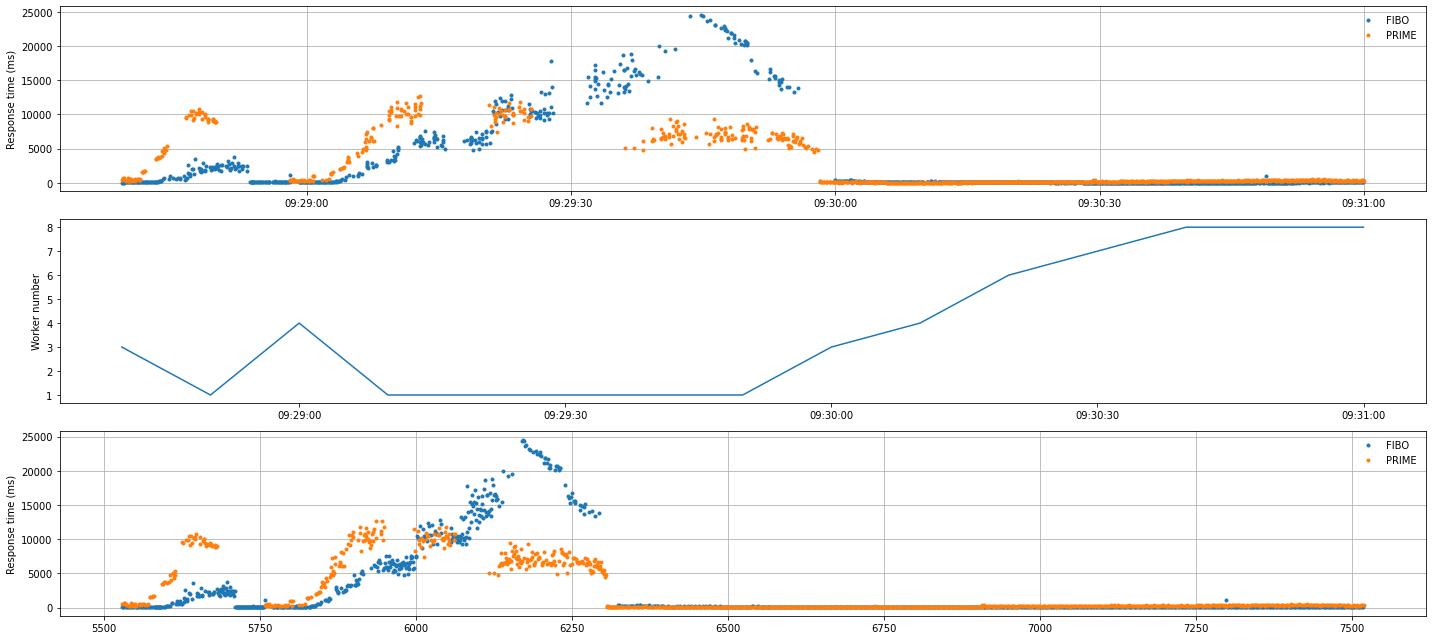

In [105]:
zoom('2023-05-20 9:28:39', '2023-05-20 9:31')

Hát azért így úgy tűnik, hogy magával húzza a másik REST API válaszidejét is.

## Helpers

In [ ]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)
